In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [9]:
df = pd.read_csv(r'C:\Users\Keyur Mistry\Desktop\ML_project\src\notebook\data\StudentsPerformance.csv')


In [10]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [12]:
df.shape

(1000, 8)

Data checks:
1. Missing values
2. Duplicates
3. check unique values for each column
4. Check statistics of data set
5. Check various categories present in categorial column

In [13]:
df.isna().sum()


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [14]:
df.duplicated().sum()


0

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [16]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [17]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [18]:
# Identify categorical columns (assuming object dtype as categorical)
categorical_columns = df.select_dtypes(include=['object']).columns

# Print unique values for each categorical column
for column in categorical_columns:
    unique_values = df[column].unique()
    print(f"Unique categories in '{column}': {unique_values}\n")

Unique categories in 'gender': ['female' 'male']

Unique categories in 'race/ethnicity': ['group B' 'group C' 'group A' 'group D' 'group E']

Unique categories in 'parental level of education': ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

Unique categories in 'lunch': ['standard' 'free/reduced']

Unique categories in 'test preparation course': ['none' 'completed']



In [20]:
# Identify categorical columns (assuming object dtype as categorical)
categorical_columns = df.select_dtypes(include=['object']).columns
numeric_columns = df.select_dtypes(include=['number']).columns

# Print the names of categorical and numeric columns
print("Categorical Features:")
print(categorical_columns)

print("\nNumeric Features:")
print(numeric_columns)

Categorical Features:
Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')

Numeric Features:
Index(['math score', 'reading score', 'writing score'], dtype='object')


In [22]:
# Calculate the total score by summing up the three test scores
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']

# Calculate the average score by taking the mean of the three test scores
df['average_score'] = df['total_score'] / 3

# Display the DataFrame to verify the new columns
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [23]:
# Count students with full marks in Math
full_marks_math = (df['math score'] == 100).sum()
print(f"Number of students with full marks in Math: {full_marks_math}")

# Count students with full marks in Reading
full_marks_reading = (df['reading score'] == 100).sum()
print(f"Number of students with full marks in Reading: {full_marks_reading}")

# Count students with full marks in Writing
full_marks_writing = (df['writing score'] == 100).sum()
print(f"Number of students with full marks in Writing: {full_marks_writing}")

Number of students with full marks in Math: 7
Number of students with full marks in Reading: 17
Number of students with full marks in Writing: 14


In [24]:
# Count students with less than 20 marks in Math
below_20_math = (df['math score'] < 20).sum()
print(f"Number of students with less than 20 marks in Math: {below_20_math}")

# Count students with less than 20 marks in Reading
below_20_reading = (df['reading score'] < 20).sum()
print(f"Number of students with less than 20 marks in Reading: {below_20_reading}")

# Count students with less than 20 marks in Writing
below_20_writing = (df['writing score'] < 20).sum()
print(f"Number of students with less than 20 marks in Writing: {below_20_writing}")

Number of students with less than 20 marks in Math: 4
Number of students with less than 20 marks in Reading: 1
Number of students with less than 20 marks in Writing: 3


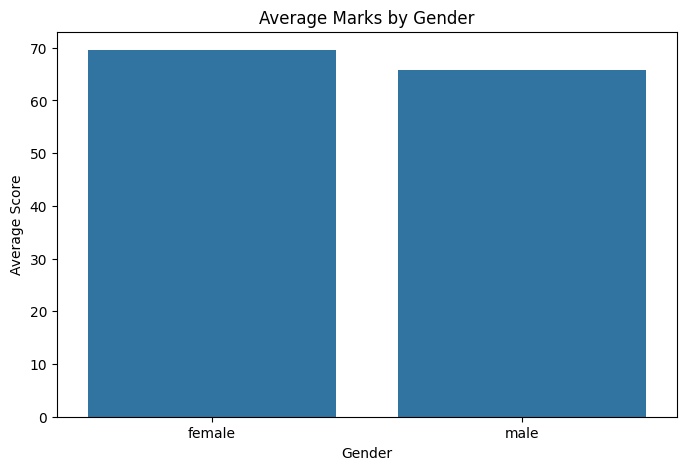

In [25]:
# Group by gender and calculate the mean of the average score
gender_avg_score = df.groupby('gender')['average_score'].mean()

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(x=gender_avg_score.index, y=gender_avg_score.values)
plt.title('Average Marks by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Score')
plt.show()

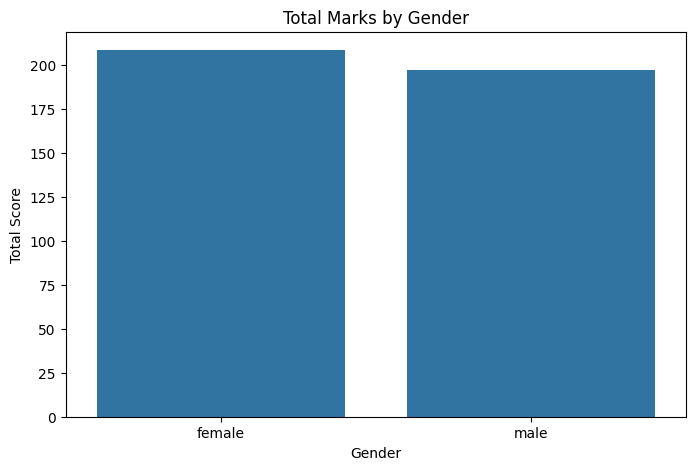

In [26]:
# Group by gender and calculate the mean of the total score
gender_total_score = df.groupby('gender')['total_score'].mean()

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(x=gender_total_score.index, y=gender_total_score.values)
plt.title('Total Marks by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Score')
plt.show()

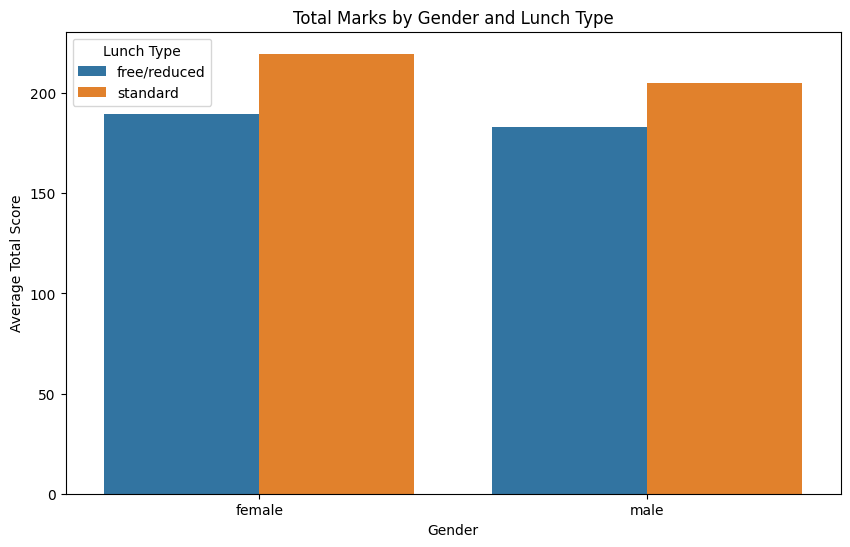

In [27]:
# Group by gender and lunch type, then calculate the mean of the total score
gender_lunch_score = df.groupby(['gender', 'lunch'])['total_score'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='gender', y='total_score', hue='lunch', data=gender_lunch_score)
plt.title('Total Marks by Gender and Lunch Type')
plt.xlabel('Gender')
plt.ylabel('Average Total Score')
plt.legend(title='Lunch Type')
plt.show()

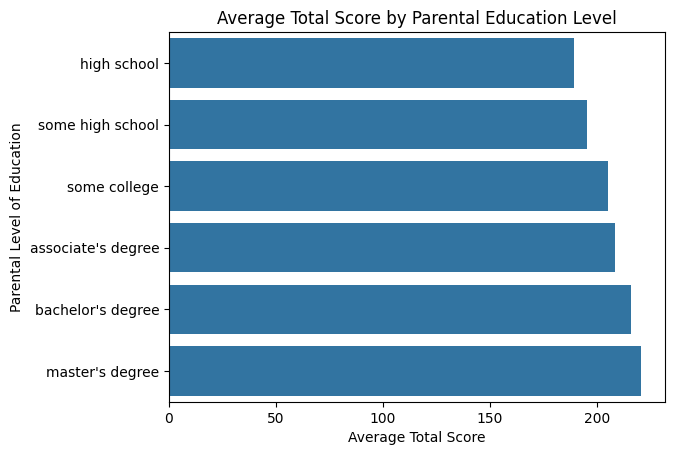

In [28]:
parental_education_score = df.groupby('parental level of education')['total_score'].mean().sort_values()
sns.barplot(x=parental_education_score.values, y=parental_education_score.index)
plt.title('Average Total Score by Parental Education Level')
plt.xlabel('Average Total Score')
plt.ylabel('Parental Level of Education')
plt.show()

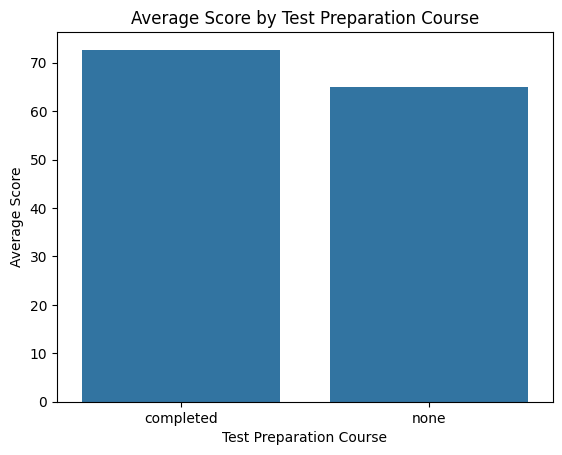

In [29]:
prep_course_effect = df.groupby('test preparation course')['average_score'].mean()
sns.barplot(x=prep_course_effect.index, y=prep_course_effect.values)
plt.title('Average Score by Test Preparation Course')
plt.xlabel('Test Preparation Course')
plt.ylabel('Average Score')
plt.show()

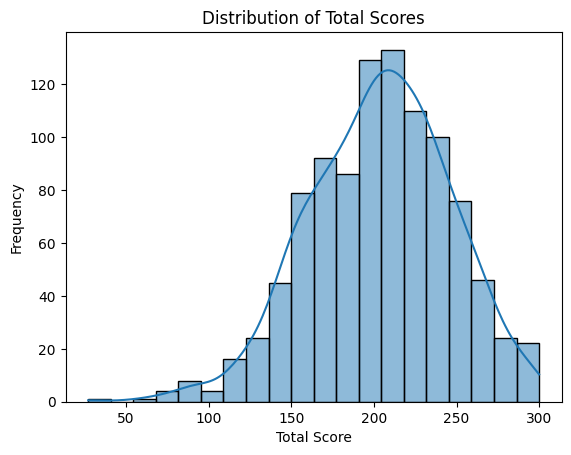

In [30]:
sns.histplot(df['total_score'], bins=20, kde=True)
plt.title('Distribution of Total Scores')
plt.xlabel('Total Score')
plt.ylabel('Frequency')
plt.show()

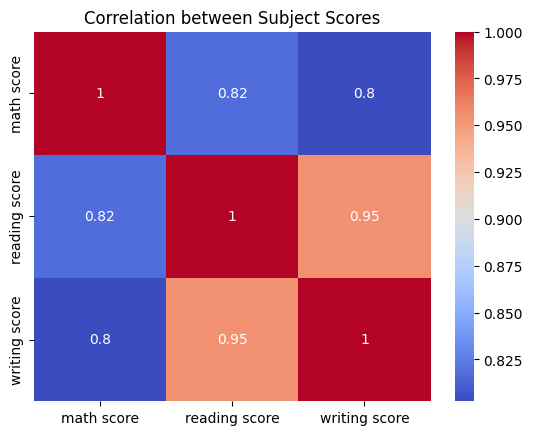

In [31]:
score_correlation = df[['math score', 'reading score', 'writing score']].corr()
sns.heatmap(score_correlation, annot=True, cmap='coolwarm')
plt.title('Correlation between Subject Scores')
plt.show()

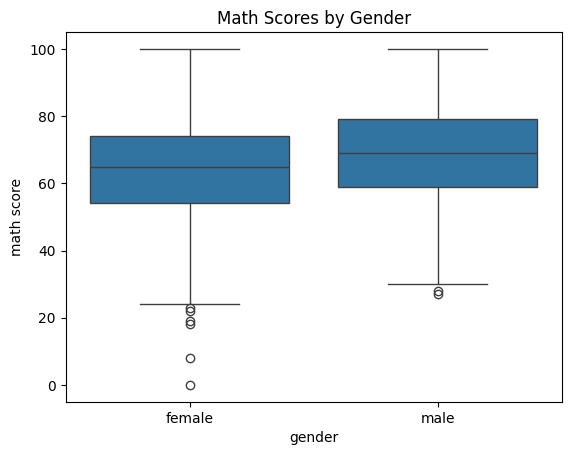

In [32]:
sns.boxplot(x='gender', y='math score', data=df)
plt.title('Math Scores by Gender')
plt.show()